In [6]:
import os
dir_ = "C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project"
os.chdir(dir_)

os.getcwd()

'C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Average rating for the drug  Ozempic is: 6.585585585585585
Average rating for the drug  Sitagliptin is: 4.743119266055046
Average rating for the drug  Mounjaro is: 6.966101694915254
Average rating for the drug  Rybelsus is: 6.25
Average rating for the drug  Victoza is: 8.375
Average rating for the drug  Jardiance is: 5.6521739130434785


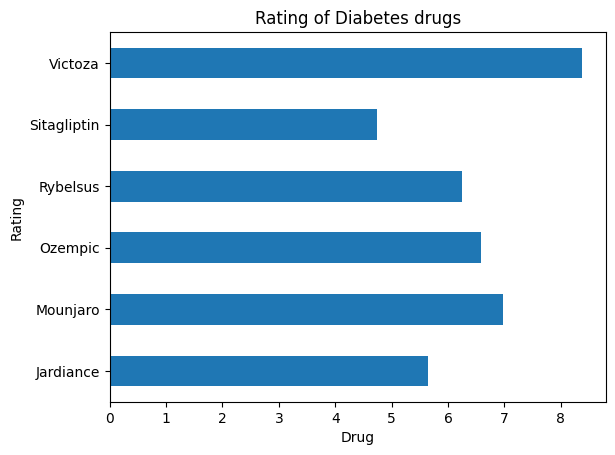

In [7]:
%run Rating_Analysis.ipynb

## LASSO

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


X = StandardScaler().fit_transform(data.iloc[:, :-1])

y = StandardScaler().fit_transform(data[['Rating']])

def get_coefs(alpha,features,target):
    X = StandardScaler().fit_transform(data[features])
    y = StandardScaler().fit_transform(data[target])
    
    lasso_model =Lasso(alpha=alpha)
    lasso_model = lasso_model.fit(y=y,X=X)
    
    coefs = lasso_model.coef_
    
    return coefs

model = Lasso(alpha=.1)
model = model.fit(X=X,y=y)



In [9]:
initial_words = list(data[words].loc[:,model.coef_!=0].columns)
# Get a list of all of the coefficients which are themselves a list for every value of the grid
Alpha = np.arange(0,1,.01)
out = [list(get_coefs(a,initial_words,['Rating'])) for a in Alpha]

C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or cons

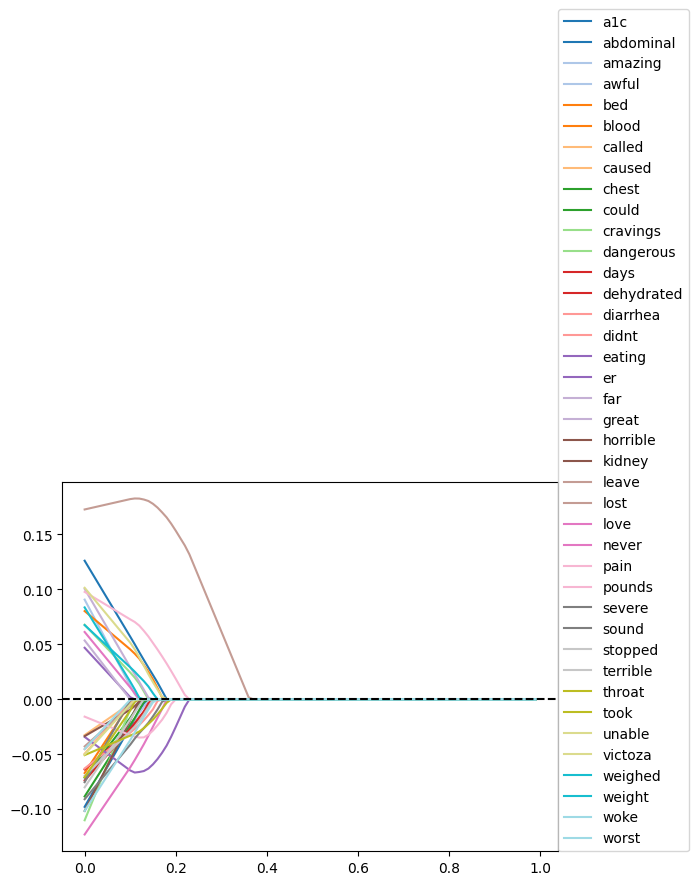

In [10]:

# Make a dataframe because its easier to plot
df_ = pd.DataFrame(out,columns=initial_words,index=Alpha)
                            #  word labels         alpha vals
# Plot it over alpha
df_.plot(cmap="tab20") # this colormap is easier to see
plt.axhline(0,color='black',ls="--") # origin line
plt.legend(loc=(1,0)) # get the legend out of the way

In [23]:
Alpha = np.arange(0,.1,.001)
# Fitting the LassoCV model with 10-fold cross validation
lasso_model = LassoCV(alphas=Alpha,cv=10)

# Fit the data
lasso_model = lasso_model.fit(X=X,y=y)


C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and i

In [24]:
lasso_model.alpha_

0.027

In [25]:
final_words = list(data[words].loc[:,lasso_model.coef_!=0].columns)

Which were the most important?

Alot of them are very small, let's just look at ones that were more than .015 in either direction:

In [26]:
final_coefs = pd.DataFrame([words,lasso_model.coef_]).T

final_coefs = final_coefs.set_index(0)

final_coefs = final_coefs[final_coefs[1]!=0]

import numpy as np
final_coefs["abs_"] = np.abs(final_coefs[1])

In [27]:
final_coefs.sort_values(by='abs_', ascending=False)

,1,abs_
0,,
lost,0.149204,0.149204
never,-0.114289,0.114289
pounds,0.084446,0.084446
a1c,0.080975,0.080975
worst,-0.073422,0.073422
...,...,...
perineum,-0.000007,0.000007
plunger,0.000001,0.000001
committed,-0.0,0.0


In [28]:
final_coefs[final_coefs['abs_']>.015].sort_values(by='abs_', ascending=False)

,1,abs_
0,,
lost,0.149204,0.149204
never,-0.114289,0.114289
pounds,0.084446,0.084446
a1c,0.080975,0.080975
worst,-0.073422,0.073422
...,...,...
eyes,-0.015469,0.015469
met,-0.015324,0.015324
well,0.015259,0.015259


## Most Postive Words

In [29]:
postive_words = final_coefs[final_coefs[1]>.015].sort_values(by=1, ascending=False)

In [30]:
positive_words = postive_words.index

In [31]:
len(positive_words)

48

## Most Negative Words

In [32]:
negative_words = final_coefs[final_coefs[1]<-0.015].sort_values(by=1, ascending=True)

In [33]:
negative_words = negative_words.index

In [34]:
len(negative_words)

93